In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
## This datasets is taken from here - https://www.kaggle.com/mohansacharya/graduate-admissions
df = pd.read_csv('D:/DataScience/DataSets/Admission_Predict.csv')

In [3]:
print(df.shape)
df.head()

(400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Drop the Serial No Column
df = df.drop(['Serial No.'],axis=1)

In [5]:
df.columns =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit']

In [6]:
X = df.drop(['Chance of Admit'],axis=1)
y = df['Chance of Admit']

In [7]:
#Splitting into Train & Test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [8]:
# Train the model
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE Score : ',mse)

MSE Score :  0.004996348666666664


In [10]:
def plot_graph(train,test,para,string):
    fig = plt.figure(figsize=(6,3))
    plt.plot(list(train.keys()),list(train.values()),label='Train '+ string)
    plt.plot(list(test.keys()),list(test.values()),label='Test '+ string)
    plt.ylabel(string+' Score')
    plt.xlabel(para)
    plt.legend()
    plt.show()

## Key Parameters In RF :
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features
- max_leaf_nodes

## n_estimators 

In [11]:
n_values = [5,10,15,20,30,50,80]
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in n_values:
    model = RandomForestRegressor(n_estimators=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

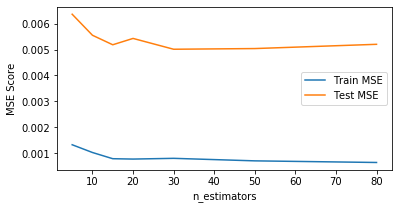

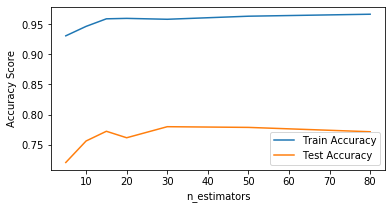

In [12]:
plot_graph(train_mse,test_mse,'n_estimators','MSE')
plot_graph(train_acc,test_acc,'n_estimators','Accuracy')

As increasing number of estimators improves accuracy but after some number, the curve become flat

## max_depth

In [13]:
depths = np.linspace(1,35,35,endpoint=True)
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in depths:
    model = RandomForestRegressor(max_depth=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

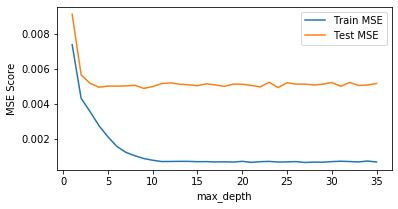

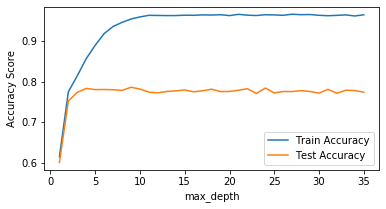

In [14]:
plot_graph(train_mse,test_mse,'max_depth','MSE')
plot_graph(train_acc,test_acc,'max_depth','Accuracy')

After certain increase in depth, the model started to overfit

## min_samples_split

In [15]:
split_size = np.linspace(.1,1.,10,endpoint=True)
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in split_size:
    model = RandomForestRegressor(min_samples_split=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

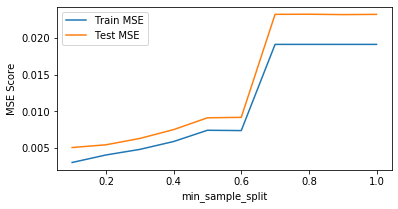

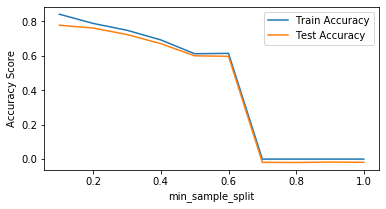

In [16]:
plot_graph(train_mse,test_mse,'min_sample_split','MSE')
plot_graph(train_acc,test_acc,'min_sample_split','Accuracy')

using all samples to split the node, will lead to underfitting

## min_samples_leaf

In [17]:
splits_leaf = np.linspace(.1,0.5,5,endpoint=True)
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in splits_leaf:
    model = RandomForestRegressor(min_samples_leaf=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

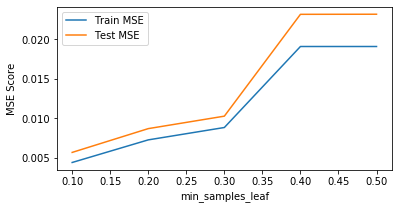

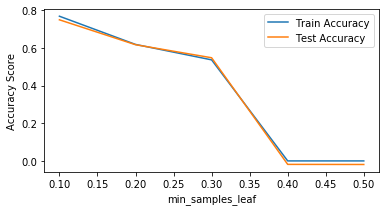

In [18]:
plot_graph(train_mse,test_mse,'min_samples_leaf','MSE')
plot_graph(train_acc,test_acc,'min_samples_leaf','Accuracy')

As similar to previous parameter, this also leads to underfitting

## max_features

In [19]:
feature = list(range(1,X_train.shape[1]))
feature

[1, 2, 3, 4, 5, 6]

In [20]:
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in feature:
    model = RandomForestRegressor(max_features=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

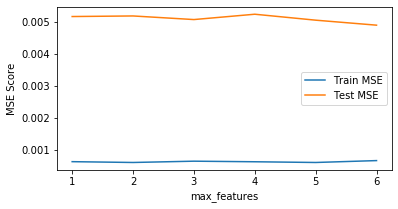

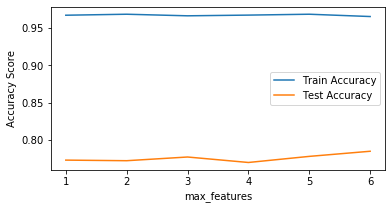

In [21]:
plot_graph(train_mse,test_mse,'max_features','MSE')
plot_graph(train_acc,test_acc,'max_features','Accuracy')

This also is overfitting case, but it is unlikely that more every value of this, will lead to overfitting. 

## max_leaf_nodes

In [22]:
n_leafs = [10,15,20,30,40,50]

In [23]:
test_mse = {}
train_acc = {}
train_mse = {}
test_acc = {}
for value in n_leafs:
    model = RandomForestRegressor(max_leaf_nodes=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

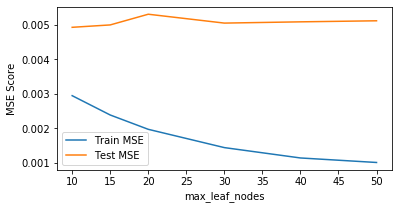

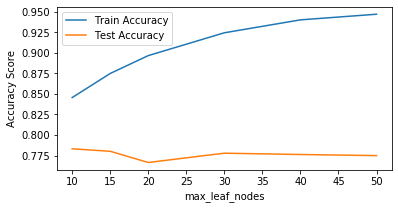

In [24]:
plot_graph(train_mse,test_mse,'max_leaf_nodes','MSE')
plot_graph(train_acc,test_acc,'max_leaf_nodes','Accuracy')

As increasing the number of leaf nodes, could also make model to overfit

## criterion

In [25]:
criteria = ['mse','mae']

In [26]:
test_mse = {}
train_acc = {}
train_mse = {}
test_acc = {}
for value in criteria:
    model = RandomForestRegressor(criterion=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

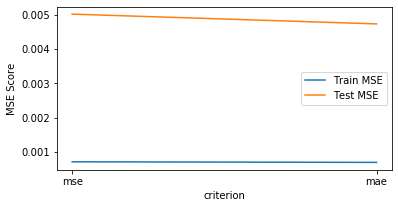

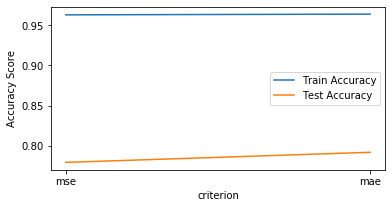

In [27]:
plot_graph(train_mse,test_mse,'criterion','MSE')
plot_graph(train_acc,test_acc,'criterion','Accuracy')

In both case, there is no much difference for this data

In [32]:
for i,j in zip(df.columns,model.feature_importances_):
    print(i,j)

GRE Score 0.13434703808323983
TOEFL Score 0.06582067926401995
University Rating 0.03587688238306662
SOP 0.06273477028360618
LOR  0.05066737547898862
CGPA 0.6320274779590277
Research 0.01852577654805125
